In [1]:
import pandas as pd
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from transformers import pipeline

In [2]:
try:
    classifier = pipeline("zero-shot-classification", device = -1)
except RuntimeError:
    print("A runtime error occurred, check if tensorflow and pytorch are correctly installed, need to be version >= 2")

C:\ProgramData\Anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
Some weights of the model checkpoint at facebook/bart-large-mnli were not used when initializing BartForSequenceClassification: ['model.encoder.version', 'model.decoder.version']
- This IS expected if you are initializing BartForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BartForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertF

In [15]:
df_original  = pd.read_csv(r'copy.csv')

In [18]:
# Dataprocessing should be inputted here, see Clara's code
df_name = df_original.head(500)

,Unnamed: 0,id,count,hate_speech,offensive_language,neither,class,tweet
0,0,0,3,0,0,3,2,rt : as a woman you shouldn't complain about ...
1,1,1,3,0,3,0,1,rt : boy dats cold
2,2,2,3,0,3,0,1,rt dawg rt : you ever fuck a bitch and she s...
3,3,3,3,0,2,1,1,rt _g_anderson: _based she look like a tranny
4,4,4,6,0,6,0,1,rt : the shit you hear about me might be true...
...,...,...,...,...,...,...,...,...
495,495,503,3,1,2,0,1,"""i'm a funky ass honkey"
496,496,504,3,1,2,0,1,"""i'm comparing kfc to the pussy"" _maxoff5"
497,497,505,3,0,3,0,1,"""i'm downloading you a new personality and ord..."
498,498,506,3,0,3,0,1,"""i'm feelin like malcolm in the middle, these ..."


In [23]:
candidate_labels = ['racist', 'sexist', 'hatespeech', 'neutral']
candidate_results = [0, 0, 0, 0]

for sent in tqdm(df_name['tweet'].values):
        #enable multiclass for future use as things can filed under more than 1 category, for exaple racist and hatespeech sometimes overlap
        
    res = classifier(sent, candidate_labels)

    if res['labels'][0] == 'racist' and res['scores'][0] > 0.5:
        candidate_results[0] = candidate_results[0] + 1
    if res['labels'][0] == 'sexist' and res['scores'][0] > 0.5:
        candidate_results[1] = candidate_results[1] + 1
    if res['labels'][0] == 'hatespeech' and res['scores'][0] > 0.5:
        candidate_results[2] = candidate_results[2] + 1
    if res['labels'][0] == 'neutral' and res['scores'][0] > 0.5:
        candidate_results[3] = candidate_results[3] + 1

    if res['scores'][0] > 0.5:
        print(sent)
        print(res['labels'])
        print(res['scores'])
        print('\n')

print(candidate_results)

  0%|          | 1/500 [00:00<05:43,  1.45it/s]

 rt : as a woman you shouldn't complain about cleaning up your house
['sexist', 'hatespeech', 'racist', 'neutral']
[0.8496432304382324, 0.08996984362602234, 0.036484286189079285, 0.02390269562602043]




  0%|          | 2/500 [00:01<04:51,  1.71it/s]

 rt : boy dats cold
['hatespeech', 'sexist', 'racist', 'neutral']
[0.8529053330421448, 0.12010505795478821, 0.019802676513791084, 0.007187006063759327]




  1%|          | 3/500 [00:02<05:58,  1.39it/s]


KeyboardInterrupt: 

In [20]:
data = {'labels': candidate_labels, 'values': candidate_results}

df_frequency = pd.DataFrame(data, columns=['labels', 'values'])

df_frequency.head()

,labels,values
0,racist,2
1,sexist,101
2,hatespeech,265
3,neutral,15


<AxesSubplot:xlabel='labels', ylabel='values'>

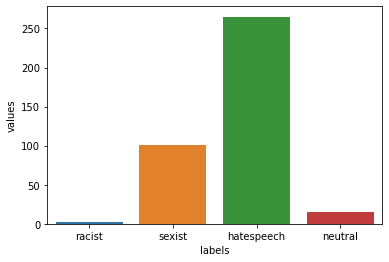

In [22]:
sns.barplot(data = df_frequency, x = 'labels', y = 'values')